In [20]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
import PIL

In [2]:
from fastbook import *

In [52]:
path = untar_data(URLs.PETS)

In [53]:
path.ls()

(#2) [Path('/storage/data/oxford-iiit-pet/images'),Path('/storage/data/oxford-iiit-pet/annotations')]

In [54]:
(path/'images')

Path('/storage/data/oxford-iiit-pet/images')

In [55]:
fname = (path/'images').ls()[0]

In [56]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['miniature_pinscher']

In [67]:
db = DataBlock(blocks=(ImageBlock, CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(seed=42),
               get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
               item_tfms=Resize(460),
               batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [68]:
dls = db.dataloaders(path/'images')

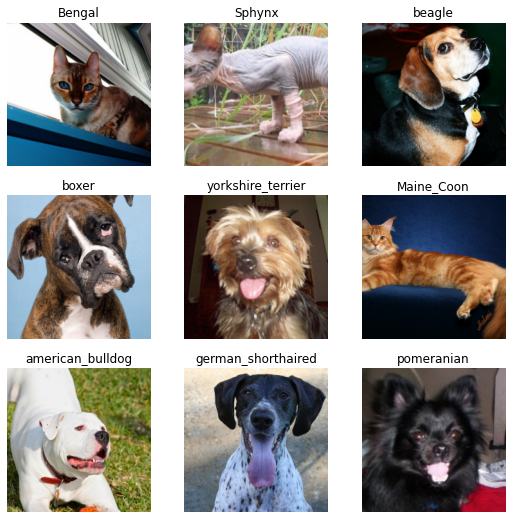

In [72]:
dls.show_batch()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.002511886414140463)

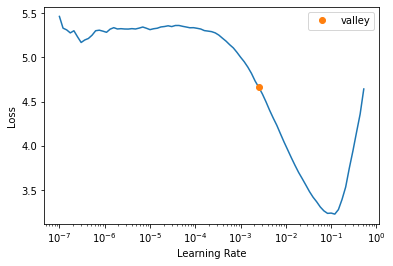

In [75]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.lr_find()

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(8, freeze_epochs = 2)

epoch,train_loss,valid_loss,error_rate,time
0,2.225432,0.531784,0.168471,00:20
1,0.868414,0.375158,0.119756,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.446707,0.315516,0.096076,00:25
1,0.398901,0.343166,0.109608,00:25
2,0.328515,0.337135,0.107578,00:25
3,0.259523,0.316537,0.093369,00:25
4,0.193101,0.309136,0.085927,00:25


In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.show_results()